## Transfer Learning Inception V3 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dom/train'
valid_path = '/content/drive/MyDrive/dom/valid'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/dom/train/*')
print(folders)

['/content/drive/MyDrive/dom/train/normal_baby', '/content/drive/MyDrive/dom/train/down_syndrome']


In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dom/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2292 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dom/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 68 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


KeyboardInterrupt: 

In [15]:
# prompt: i want to check the runtime is gpu or not

import tensorflow as tf

# Check if a GPU device is available
if tf.config.list_physical_devices('GPU'):
  print('GPU device is available')
else:
  print('GPU device is not available')


GPU device is available


In [16]:
import matplotlib.pyplot as plt

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: name 'r' is not defined

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

#  model.save('/content/drive/MyDrive/dom/model_inception.h5')

In [18]:

# y_pred = model.predict(test_set)


In [19]:
y_pred

NameError: name 'y_pred' is not defined

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

NameError: name 'y_pred' is not defined

In [ ]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

In [ ]:
# HEREEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('/content/drive/MyDrive/dom/model_inception.h5')

In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
# model = load_model('/content/drive/MyDrive/dom/model_inception.h5')
PATH='/content/drive/MyDrive/dom/sample/2.png'

# Load the image you want to make a prediction on
img=image.load_img(PATH,target_size=(224,224))



# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to fit the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Scale the image pixels by 255
img_array /= 255.

# Make a prediction
predictions = model.predict(img_array)
confidence = np.max(predictions[0])

# Get the index of the highest probability
predicted_index = np.argmax(predictions[0])

print(f"Predicted index: {predicted_index}")


1/1 [==============================] - 4s 4s/step
Predicted index: 0


In [23]:
from PIL import Image

Predicted class: down_syndrom with an confidence of 100.0


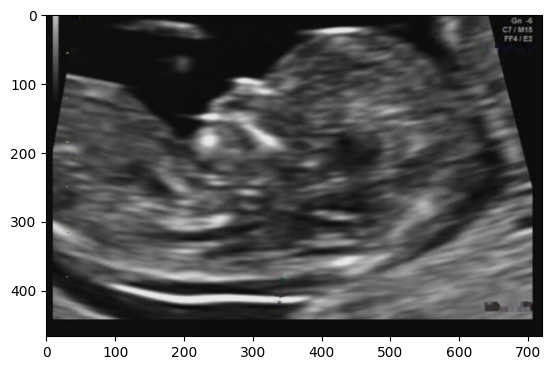

In [24]:
class_names = ['down_syndrom', 'normalchild']  # replace with your class names
predicted_class = class_names[predicted_index]
print(f"Predicted class: {predicted_class} with an confidence of {confidence*100}")
# prompt: write the code to show the img

import matplotlib.pyplot as plt

# Load the image
img = plt.imread(PATH)

# Show the image
plt.imshow(img)
plt.show()

